In [1]:
import pandas as pd
from scipy.special import comb
from kmeans import KMeans
import matplotlib.pyplot as plt
import numpy as np
import agnes

In [2]:
def dist_euclidiana(x, y):
    return np.linalg.norm(x-y)

def rand_index(cluster1, cluster2):
    """
    Calcula o rand index entre dois clusters
    """
    tp_plus_fp = comb(np.bincount(cluster1), 2).sum()
    tp_plus_fn = comb(np.bincount(cluster2), 2).sum()
    A = np.c_[(cluster1, cluster2)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum() for i in set(cluster1))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

def comparar_clusterizacao(X, classes, clusters, label="Kmeans"):
    fig, ax = plt.subplots(ncols=2,figsize=(10,5))
    for tc, pc in zip(classes, clusters):
        ax[0].scatter(X[classes==tc, 0], X[classes==tc, 1])
        ax[0].set_title("Dados reais")    
        ax[1].scatter(X[clusters==pc, 0], X[clusters==pc, 1])
        ax[1].set_title("Clusterização {}".format(label))
    plt.show()

In [23]:
def read_dataset(nome):
    f = open(nome, "r")
    lines = f.readlines()
    rows = []
    for l in lines:
        colunas = l.split("\t")
        row = [c.strip() for c in colunas]
        rows.append(row)

    df_ = pd.DataFrame(rows,columns=['v1','v2','class'])
    X_ = df_.values
    X_ = X_[:, :-1].astype('float')
    classes = df_['class'].values.astype('int')
    return X_, classes

# Spiral dataset

In [24]:
X_spiral, classes_spiral = read_dataset("spiral.txt")

## KMeans

In [26]:
kmeans = KMeans(3)
kmeans.fit(X_spiral)
spiral_clusters = kmeans.predict(X_spiral)

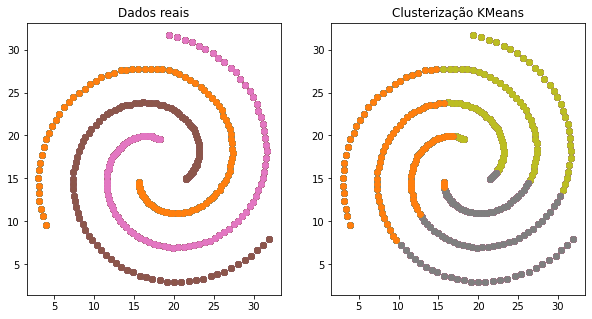

In [27]:
comparar_clusterizacao(X_spiral, classes_spiral, spiral_clusters)

#

In [30]:
ri = rand_index(classes_spiral, spiral_clusters)
print ("Spiral dataset\nRand index kmeans: {:.4f}".format(ri))

Spiral dataset
Rand index kmeans: 0.5543


## Clusterização Hierárquica

In [32]:
h_clusters_spiral = agnes.agnes(X_spiral,3, v=True)

Calculando matriz de distâncias.
Obtendo clusters.


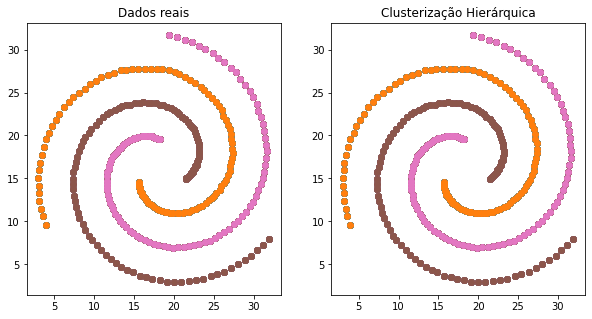

In [35]:
comparar_clusterizacao(X_spiral, classes_spiral, h_clusters_spiral.astype('int'), label="Hierárquica")

In [42]:
ri = rand_index(classes_spiral, h_clusters_spiral.astype('int'))
print ("Spiral dataset\nRand index agnes: {:.4f}".format(ri))

Spiral dataset
Rand index agnes: 1.0000


# Agregation dataset

In [36]:
X_agreg, classes = read_dataset("Aggregation.txt")

## KMeans

In [37]:
kmeans = KMeans(7)
kmeans.fit(X_agreg)
agreg_clusters = kmeans.predict(X_agreg)

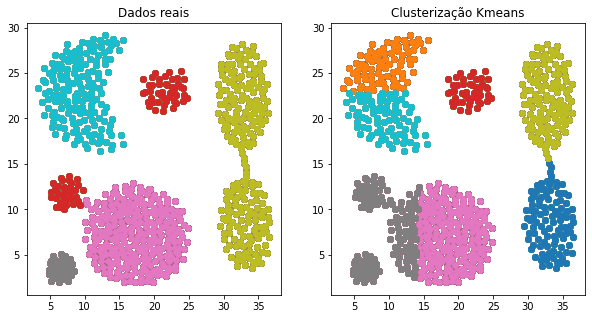

In [43]:
comparar_clusterizacao(X_agreg, classes, agreg_clusters)

In [39]:
ri = rand_index(classes, agreg_clusters)
print ("Rand index: {:.4f}".format(ri))

Rand index: 0.9164


## Clusterização Hierárquica (Agnes)

In [40]:
h_clusters_agreg = agnes.agnes(X_agreg, 7, v=True)

Calculando matriz de distâncias.
Obtendo clusters.


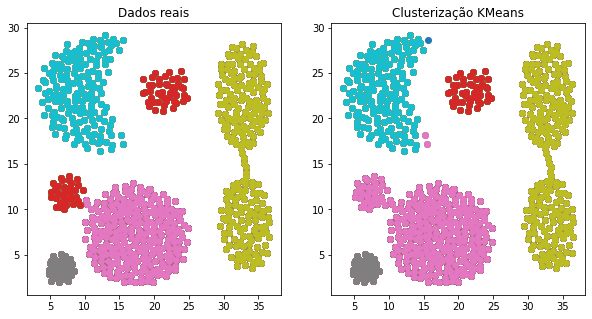

In [8]:
comparar_clusterizacao(X_agreg, classes, h_clusters_agreg.astype('int'))

In [7]:
ri_hc = rand_index(h_clusters_agreg, classes)
print ("Rand index: {:.4f}".format(ri_hc))

Rand index: 0.9257


# Comentários dos resultados

A tabela à seguir mostra os Rand Index dos algoritmos de clusterização utilizados nas bases *Aggregation* e *Spiral*.

|             | KMeans | AGNES |
|-------------|--------|-------|
| Spiral      | 0.553  | 1.0   |
| Aggregation | 0.916  | 0.925 |

Nota-se que o KMeans teve um desempenho inferior ao AGNES nas duas bases utilizadas, especialmente para a base *Spiral*. Isso se deve ao fato de que cada espiral representar um grupo e, devido ao funcionamento do KMeans, pontos de espiral são idenfiticadas mais próximas à outra espiral.

A base *Agregation* possui um grupo (em vermelho nas figuras anteriores) que os dois algoritmos não conseguiram agrupar corretamente. Como pode ser visto nas figuras, esse grupo possui duas partes bem distantes entre si, de forma que uma delas está mais próxima dos grupos no canto inferior esquerdo da imagem do que qualquer outro grupo.